In [1]:
import os
os.chdir("/Users/jacksonwalters/Documents/GitHub/enefit-kaggle/predict-energy-behavior-of-prosumers/")
!ls

client.csv                            gas_prices.csv
county_id_to_name_map.json            historical_weather.csv
electricity_prices.csv                public_timeseries_testing_util.py
enefit                                train.csv
example_test_files                    weather_station_to_county_mapping.csv
forecast_weather.csv


In [33]:
import tensorflow as tf
import numpy as np

In [44]:
#load the model
dnn_model = tf.keras.models.load_model('../models/dnn_model.keras')

In [29]:
import pickle
dnn_model=pickle.load(open('../models/dnn_model.sav', 'rb'))

In [45]:
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 23)               47        
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                1536      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,808
Trainable params: 5,761
Non-trainable params: 47
_________________________________________________________________


In [16]:
from load_data import merged_df

In [17]:
df = merged_df()

loading train data...
loading gas_prices...
loading electricity_prices...
loading forecast_weather...
merging train and gas_prices...
merging electricity_prices...
merging forecast_weather...


In [20]:
predict_df = df[:100_000].copy().drop(columns=['target'])

In [46]:
predictions = dnn_model.predict(predict_df)

2023-12-16 16:49:03.196830: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [42]:
import matplotlib.pyplot as plt

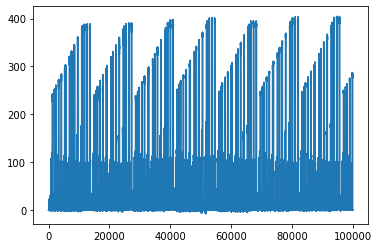

In [47]:
plt.plot(predictions)

(array([64473.,  4254., 15449.,  1576.,  1144.,   379.,  3606.,  2701.,
         2345.,  4073.]),
 array([ -8.327282,  32.977306,  74.28189 , 115.58648 , 156.89107 ,
        198.19566 , 239.50024 , 280.80484 , 322.10944 , 363.414   ,
        404.7186  ], dtype=float32),
 <BarContainer object of 10 artists>)

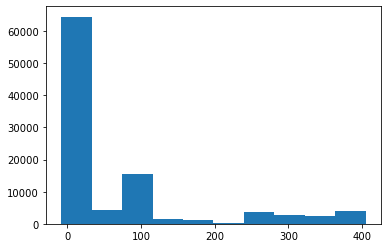

In [51]:
plt.hist(predictions)